# fit1

In [5]:
#Run a simple linear regression 

fit1 = lm(dist~speed, data=cars)
#summary(fit)

#The fitted model

The fitted model : $ \hat{dist} = -17.57 + 3.93 speed $

# fit 2

Another model:

$$y_i = \beta_1x_i + e_i$$

In [6]:
#Run a simple linear regression 

fit2 = lm(dist ~ -1 + speed, data=cars) #-1 means we don't need a intercept ( we only take the slope)
#summary(fit2) 

The fitted model : $\hat{dist} = 2.090  speed $

The p-value of "speed: is <2e-16 (0.000) , If the p-value is below (=) the level of significance, there is sufficient evidence in the data to support that the slope of speed is not zero.

Is the prediction perfect or not? 

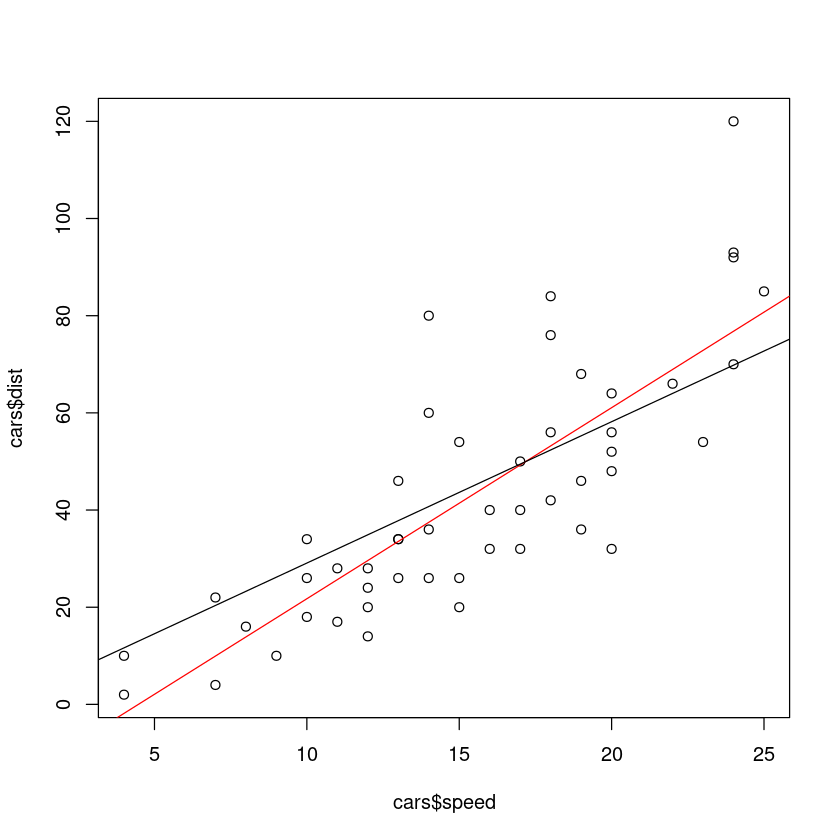

In [8]:
# Plot the data (x,y)

plot(cars$speed, cars$dist)

#plot the regression line
abline(fit1,col="red")
abline(fit2)

# Predict

In [9]:
#Find the predicted value and a confidence interval

#create a dataframe for the predictor(s)
ndat= data.frame(speed=14)

#To make a prediction when speed = 14
# fit is related to the model with intercept
predict(fit1,newdata=ndat)


#Example : based on the predictive model without the intercept, predict the stopping distance if the speed is 14.
#fit 2 is related to the model without intercept
predict(fit2,newdata=ndat)

1 
37.47463

1 
40.72785

# Add a confidence/prediction interval 

In [11]:
#To add a confidence interval result
# interval = 'confidence', Level = 0.95

predict(fit1, newdata=ndat, interval='confidence', level = 0.95)

#To add a prediction interval result
# interval = 'prediction', Level = 0.95

predict(fit1, newdata=ndat, interval='predict', level = 0.95)

,fit,lwr,upr
1,37.47463,32.94778,42.00147


,fit,lwr,upr
1,37.47463,6.222305,68.72695


# Residual plot

It can be helpful to check if the model has a good fit or not. In a redsidual plot, we plot the predictor against the residuals. or we plot the predicted values against residuals

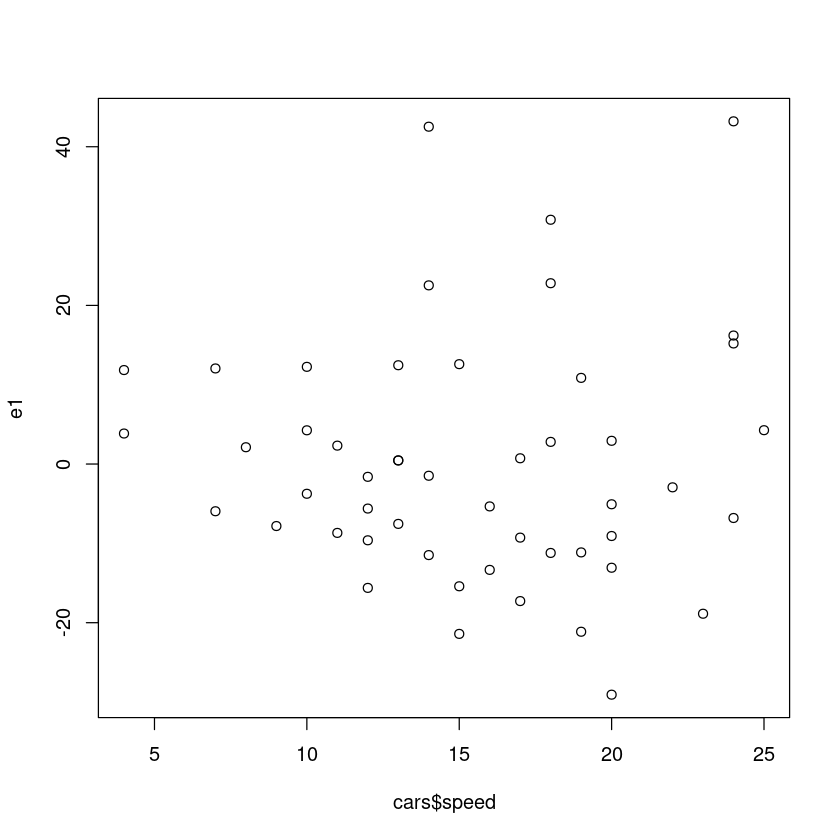

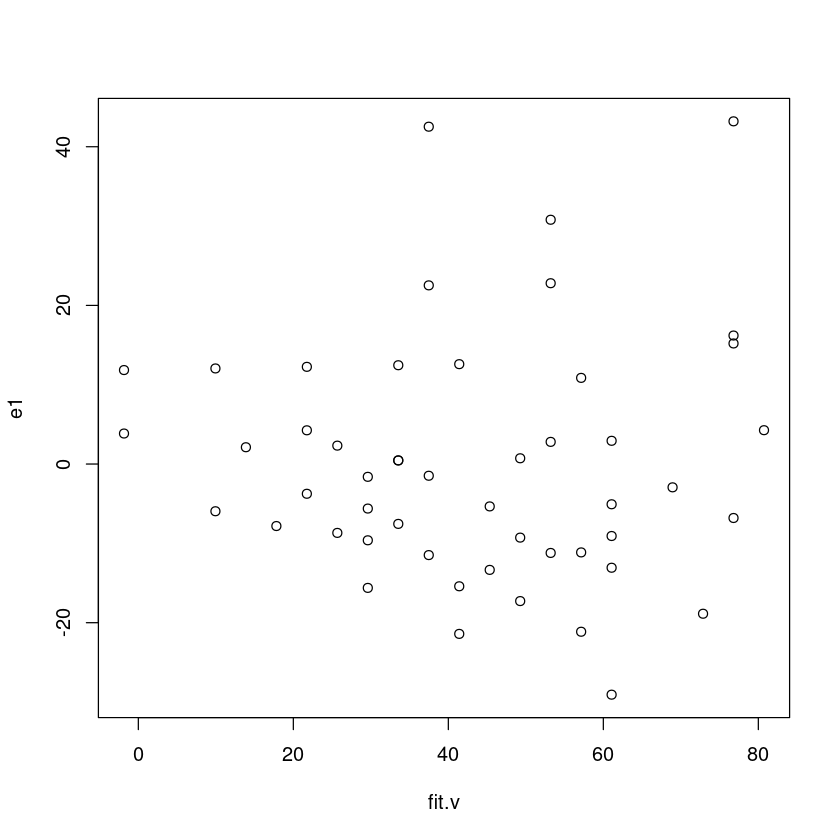

In [13]:
# Residual plot
# to obtain the residuals of the model with the intercept

e1 = fit1$residuals

#fitted values of the model
fit.v = fit1$fitted

#cars$speed : 
plot(cars$speed, e1)

#fit.v : predicted values
#e1 : residuals
plot(fit.v,e1)

# If there are any curved patterns, ..., maybe we can improve the model.

# Performance measure for a predictive model

## MSE, RMSE, MAD

In [15]:
#the difference between the actual values and the predicted values(fitted values)
rd0=cars$dist - fit1$fitted.values 

#MSE (Mean Squared Error)
MSE=mean(rd0^2)
MSE    

#RMSE
sqrt(MSE)

#MAD
median(abs(rd0))

[1] 227.0704

[1] 15.06886

[1] 10.23657

### R-suqared 


**R-squared:** $r^2$ (percentage value)

**where $r$ is the correlation between the predicted values and the true observed values.**

In [23]:
#R-suqared 
r= cor(cars$dist,fit$fitted.values)
RSQ = r^2
RSQ

#About 65% information in the response is explained by the model.

[1] 0.6510794

In [24]:
# In the previous Example, a simple linear model may be good. 

In [37]:
jaws <- read.table("../DASC5302/jaws.txt", header = TRUE)
head(jaws)

#fit=with(dat,lm(bone~age))
jfit = lm(bone~age, data=jaws)
summary(jfit)

,age,bone
,<dbl>,<dbl>
1,0.000000,0.00000
2,5.112000,20.22000
3,1.320000,11.11130
4,35.240000,140.65000
5,1.632931,26.15218
6,2.297635,10.00100



Call:
lm(formula = bone ~ age, data = jaws)

Residuals:
    Min      1Q  Median      3Q     Max 
-53.259 -10.457   2.353  18.048  33.589 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   53.259      5.837   9.124 2.23e-12 ***
age            1.642      0.201   8.166 6.97e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 22.3 on 52 degrees of freedom
Multiple R-squared:  0.5619,	Adjusted R-squared:  0.5534 
F-statistic: 66.68 on 1 and 52 DF,  p-value: 6.968e-11


[1] 478.7808
[1] 0.5618531


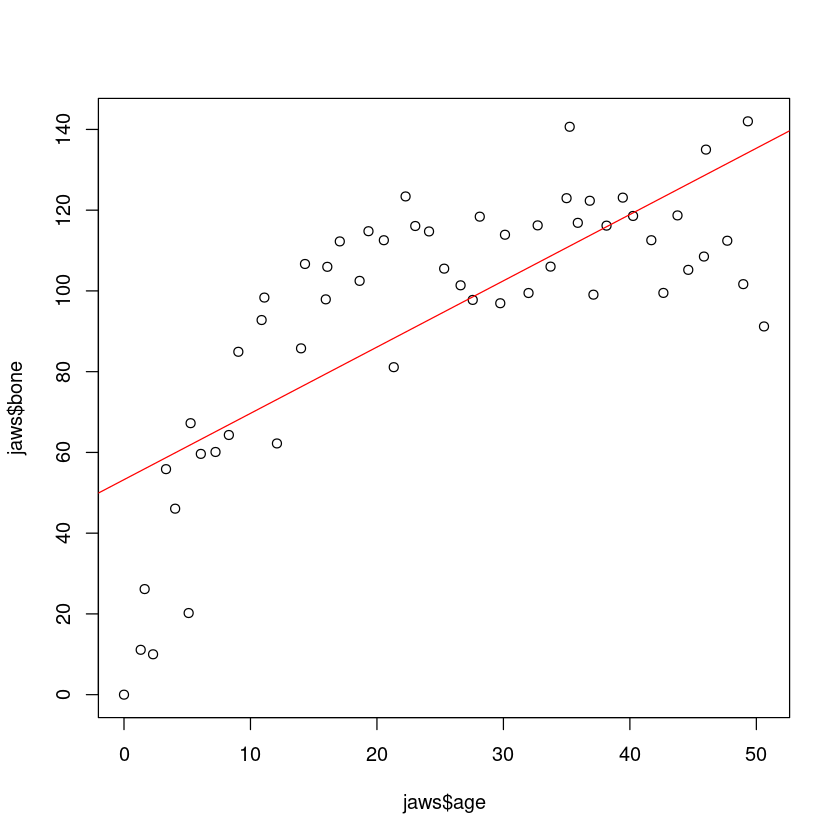

In [39]:
#plot the data
plot(jaws$age,jaws$bone)

#plot the regression line
abline(jfit,col="red")

MSE.jfit = mean(jfit$residuals^2)
print(MSE.jfit)


r=cor(jaws$bone,jfit$fitted.values)
RSQ.1= r^2
print(RSQ.1)

# Polynomial regression 

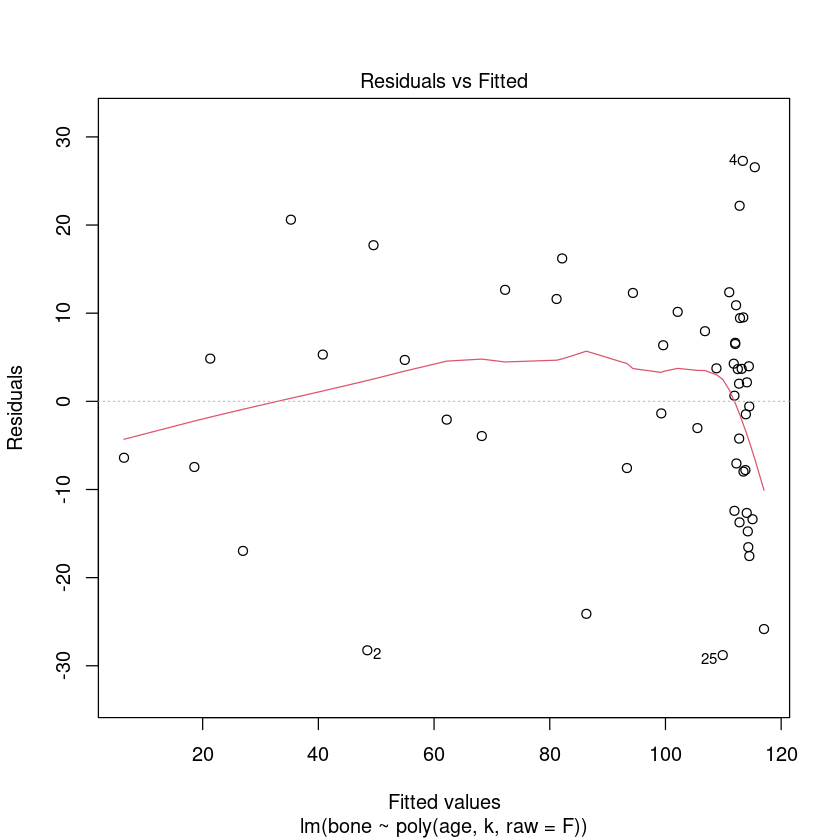

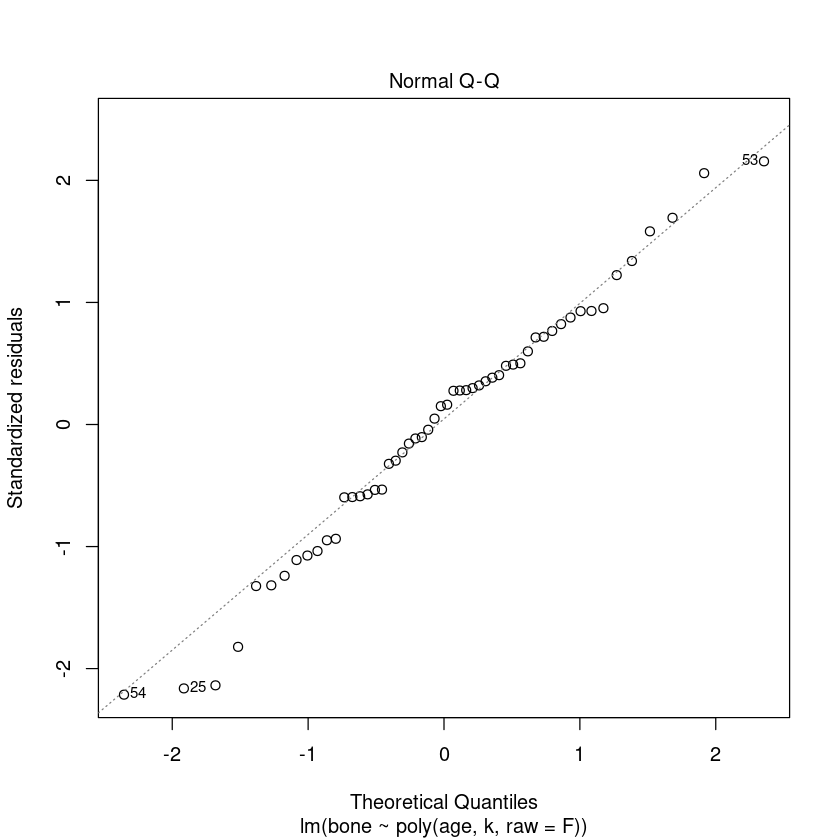

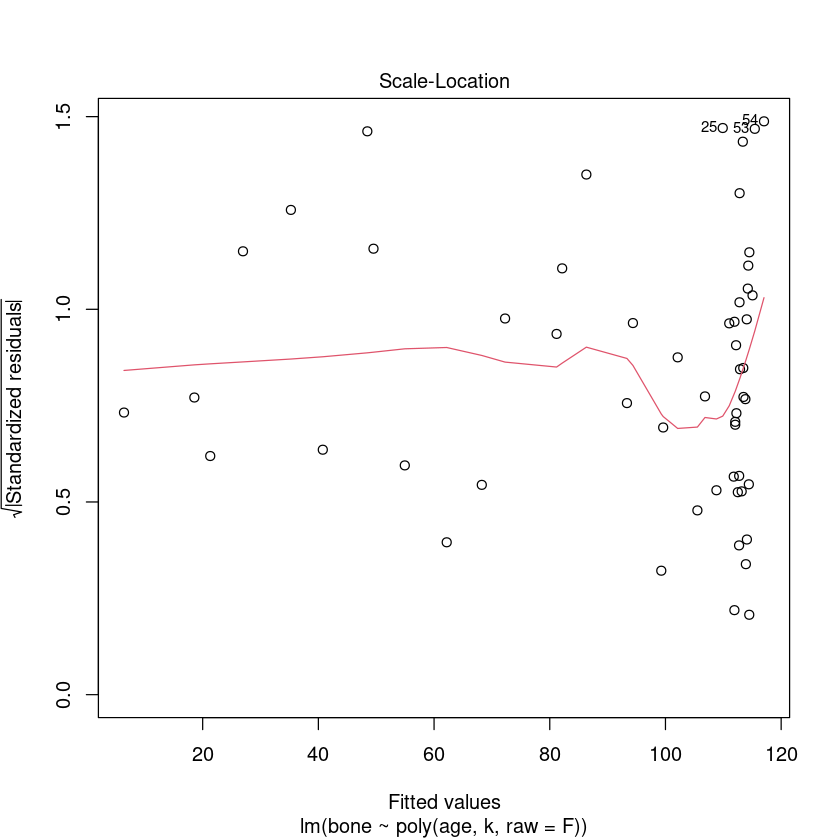

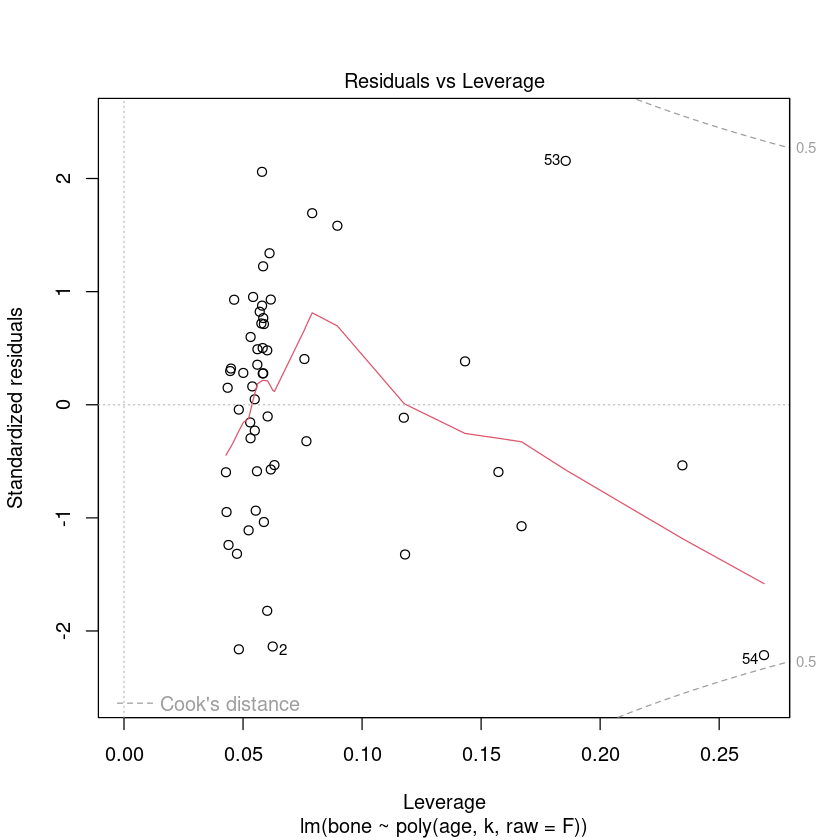

In [45]:
#Polynomial regression, polynomial feature
#polynomial with the order of 3

k=3

fit.1 = lm(bone~poly(age,k,raw=F),data=jaws)

fit.2 = lm(bone~poly(age,k,raw=T),data=jaws)

#round(fit.1$fitted.values - fit.2$fitted.values,4)

plot(fit.1)

In [41]:
MSE.fit1 = mean(fit.1$residuals^2)
print(MSE.fit1)

[1] 172.4944


In [43]:
r=cor(jaws$bone,jfit$fitted.values)
RSQ= r^2
print(RSQ.1)

#MSE, the smaller the better ; R^2 : the higher the better

[1] 0.5618531
